## Importing Libraries

In [1]:
import pandas as pd #creates dataframes and structures data

## Data Collection

In [2]:
raw_data = pd.read_csv("E:\\College\\MSC-1\\SEM 2\\NLP\\mail_data.csv")

In [3]:
#print(raw_data)
#raw_data.sample(5)
raw_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
raw_data.shape

(5572, 2)

## Data Cleaning

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Label encoding 
# label spam mail= 1 ; ham mail = 0 ;

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
raw_data['Category'] = encoder.fit_transform(raw_data['Category'])

In [8]:
raw_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# check missing values
raw_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
# check duplicate values
raw_data.duplicated().sum()

415

In [11]:
# remove dupicate values
raw_data = raw_data.drop_duplicates(keep='first')

In [12]:
raw_data.duplicated().sum()

0

In [13]:
raw_data.shape

(5157, 2)

## Data Analysis

In [14]:
raw_data['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

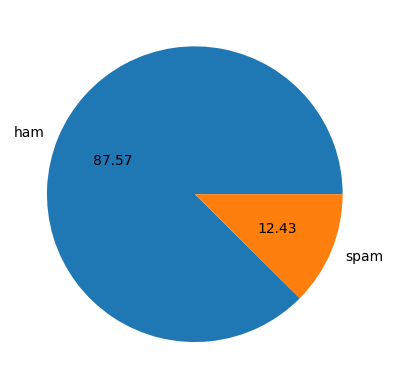

In [15]:
import matplotlib.pyplot as plt
plt.pie(raw_data['Category'].value_counts(),labels = ['ham','spam'],autopct='%0.2f')
plt.show()

## Data Preprocessing
lower case
tokenzation
remove special word
remove stop words
stemming

In [16]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Salma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Salma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
ps = PorterStemmer()
def process_msg(msg):
    msg = msg.lower()
    msg = nltk.word_tokenize(msg)
    
    y = []
    for i in msg:
        if i.isalnum():
            y.append(i)
    
    msg = y[:]
    y.clear()
    
    for i in msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    msg = y[:]
    y.clear()
    
    for i in msg:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [19]:
raw_data['New_Message'] = raw_data['Message'].apply(process_msg)

In [20]:
raw_data.head()

,Category,Message,New_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [21]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [22]:
spam_words = wc.generate(raw_data[raw_data['Category'] == 1]['New_Message'].str.cat(sep=" "))

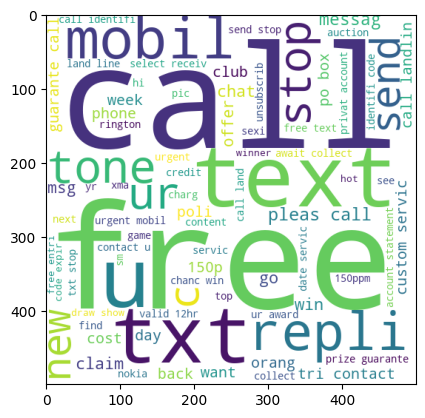

In [23]:
plt.imshow(spam_words)

In [24]:
ham_words = wc.generate(raw_data[raw_data['Category'] == 0]['New_Message'].str.cat(sep=" "))

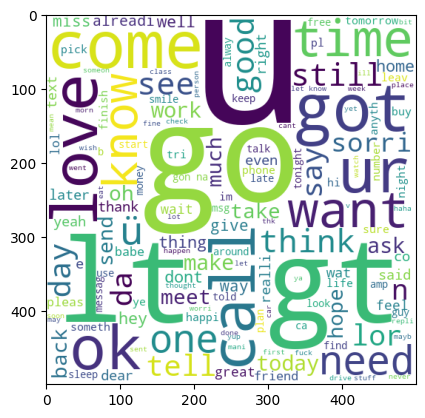

In [25]:
plt.imshow(ham_words)

In [26]:
x = raw_data['New_Message']
y = raw_data['Category']

In [27]:
print(x)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: New_Message, Length: 5157, dtype: object


In [28]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32


## Splitting data into training and testing set

In [29]:
from sklearn.model_selection import train_test_split #splits data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 3)

## Feature Extraction


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer #text into numerical values
tfidf=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [31]:
print(x_train)

  (0, 5292)	0.48165376743289773
  (0, 5225)	0.4884634217230525
  (0, 1003)	0.5574535219629946
  (0, 1904)	0.46760956449516333
  (1, 1275)	0.4726587863760494
  (1, 4644)	0.6231346851450014
  (1, 5142)	0.6231346851450014
  (2, 233)	0.19356923830026576
  (2, 624)	0.21663650753559124
  (2, 5407)	0.25726957878240814
  (2, 4038)	0.24129429532321817
  (2, 5814)	0.22659565677667512
  (2, 527)	0.24129429532321817
  (2, 15)	0.25726957878240814
  (2, 2047)	0.20491854785103492
  (2, 625)	0.25726957878240814
  (2, 3507)	0.25726957878240814
  (2, 3601)	0.25726957878240814
  (2, 3600)	0.25726957878240814
  (2, 3258)	0.2666042654127333
  (2, 5403)	0.14406320941265996
  (2, 2599)	0.18973503978504572
  (2, 2960)	0.18741742726394045
  (2, 3261)	0.22291217401122057
  (2, 5477)	0.12470371300812501
  :	:
  (4119, 2441)	0.4180427838563303
  (4120, 981)	0.6748937765621384
  (4120, 2548)	0.49463461985467316
  (4120, 3141)	0.4251227459348022
  (4120, 1674)	0.3451458156892112
  (4121, 4726)	0.489509195648076
  (

## Training the model on training set

In [32]:
from sklearn.linear_model import LogisticRegression #binary output 0/1

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## Prediction the trained data

In [33]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

pred_on_train = model.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train,pred_on_train)

## Accuracy check on training data

In [34]:
print("Accuracy",accuracy_on_training_data)
print(confusion_matrix(y_train,pred_on_train))
print("Precision",precision_score(y_train,pred_on_train))

Accuracy 0.9621818181818181
[[3619    4]
 [ 152  350]]
Precision 0.9887005649717514


## Prediction on test data

In [35]:
pred_on_test = model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test,pred_on_test)

## Accuracy check on test data

In [36]:
print("Accuracy",accuracy_on_test_data)
print(confusion_matrix(y_test,pred_on_test))
print("Precision",precision_score(y_test,pred_on_test))

Accuracy 0.9544573643410853
[[893   0]
 [ 47  92]]
Precision 1.0


## Building a Predictive System

In [37]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours "]

# convert text to feature vector

input_mail = tfidf.transform(input_mail)

# # Prediction on new data

prediction = model.predict(input_mail)
print(prediction)

if prediction[0]==0:
    print("Ham Mail....!")
else:
    print("Spam Mail....!")

[1]
Spam Mail....!
